# Assignment 1

##### Created by Qihang Ma -- 2023.01.25

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, t, ttest_1samp, norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize 
import warnings
warnings.filterwarnings("ignore")

## Problem 1 - Prove the skewness and kurtosis are biased or not

STEPS:
1. Sample 100, 1,000, 10,000 standardized random normal values.
2. Calculate the skewness, kurtosis
3. Sample the skewness, kurtosis by repeating steps 1 and 2 1000 times.
4. Calculate the mean kurtosis and standard deviation.
5. If the value is lower than threshold (typically 5%), then reject the hypothesis that the kurtosis function is unbiased.

*Prove that the skewness and kurtosis are biased when the sample is small and unbiased when the sample is large.

In [2]:
def TestSkewness(sample_num): 
    samples = 1000

    skewness = np.empty(samples)
    for i in range(samples):
        skewness[i] = skew(np.random.normal(0, 1,sample_num))

    print("The mean Skewness is {}.\nThe standard deviation is {}." .format(np.mean(skewness), np.std(skewness)))

    t_stat, p_val = ttest_1samp(skewness, popmean=0)

    alpha = 0.05

    if p_val < alpha:
        print("For skewness, the calculated p-value is {}.\nReject the null hypothesis.\n" .format(p_val))
    else:
        print("For skewness, the calculated p-value is {}.\nFail to reject the null hypothesis.\n" .format(p_val))
    return

def TestKurtosis(sample_num):
    samples = 1000

    kurts = np.empty(samples)
    for i in range(samples):
        kurts[i] = kurtosis(np.random.normal(0, 1,sample_num))

    print("The mean kurtosis is {}.\nThe standard deviation is {}." .format(np.mean(kurts), np.std(kurts)))

    t_stat, p_val = ttest_1samp(kurts, popmean=0)

    alpha = 0.05

    if p_val < alpha:
        print("For kurts, the calculated p-value is {}.\nReject the null hypothesis.\n" .format(p_val))
    else:
        print("For kurts, the calculated p-value is {}.\nFail to reject the null hypothesis.\n" .format(p_val))
    return

In [3]:
sample = [100,1000,10000]
for i in sample:
    print("For {} samples: " .format(i))
    TestSkewness(i)
    TestKurtosis(i)

For 100 samples: 
The mean Skewness is 0.009349494522596714.
The standard deviation is 0.24251669769565637.
For skewness, the calculated p-value is 0.22331775952816915.
Fail to reject the null hypothesis.

The mean kurtosis is -0.10433994519532026.
The standard deviation is 0.41621493122916636.
For kurts, the calculated p-value is 6.136377330163198e-15.
Reject the null hypothesis.

For 1000 samples: 
The mean Skewness is 0.0020834413011323284.
The standard deviation is 0.07816936190921231.
For skewness, the calculated p-value is 0.3997558592517929.
Fail to reject the null hypothesis.

The mean kurtosis is -0.005405036251225029.
The standard deviation is 0.16020060030302838.
For kurts, the calculated p-value is 0.2865037483659151.
Fail to reject the null hypothesis.

For 10000 samples: 
The mean Skewness is -0.0010537423373103033.
The standard deviation is 0.025819614351380298.
For skewness, the calculated p-value is 0.1973721635061258.
Fail to reject the null hypothesis.

The mean kurt

## Problem 2 - OLS, MLE, Comparation

Fit the data in problem2.csv using OLS and calculate the error vector. Look at its distribution. How well does it fit the assumption of normally distributed errors?

Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit?

What are the fitted parameters of each and how do they compare? What does this tell us about the breaking of the normality assumption in regards to expected values in this case? 

In [4]:
data = pd.read_csv('problem2.csv')
data['constant'] = 1
x = data['x']
X = data[['constant','x']]
y = data ['y']

### Fit with OLS

In [5]:
ols_model = sm.OLS(y,X).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           4.34e-06
Time:                        11:59:33   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.1198      0.121      0.990      0.325      -0.120       0.360
x              0.6052      0.124      4.867      0.000       0.358       0.852
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.673
Skew:                          -0.267   Prob(JB):                     3.28e-10
Kurtosis:                       6.193   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Skewness of error is -0.26726658552879606.
The Kurtosis of error is 3.1931010009568777.


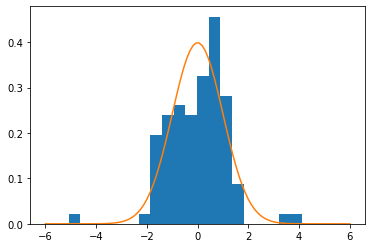

In [6]:
error = ols_model.resid
plt.hist(error, bins = 20, density = True)
x_axis = np.linspace(-6, 6, 100)
plt.plot(x_axis, norm.pdf(x_axis, 0,1))
plt.savefig('error_distribution.png')

print("The Skewness of error is {}.\nThe Kurtosis of error is {}." .format(skew(error),kurtosis(error)))

### Fit with MLE given the assumption of normality 

In [7]:
# define likelihood function
def MLE_Norm(params, x, y):
    yhat = params[0] + params[1]*x # predictions
    negLL = -1 * np.sum(stats.norm.logpdf(y, yhat, params[2]))
    return(negLL)

In [8]:
results_norm = minimize(MLE_Norm, x0=(1,1,1), args=(x, y))
results_norm

      fun: 159.9920966891625
 hess_inv: array([[ 1.42083109e-02, -1.06286391e-04, -6.03001775e-05],
       [-1.06286391e-04,  1.53428108e-02, -3.15255082e-04],
       [-6.03001775e-05, -3.15255082e-04,  7.44927901e-03]])
      jac: array([ 1.90734863e-06,  1.90734863e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.11983619, 0.60520485, 1.19839408])

### Fit wit MLE given the assumption of t-distribution 

In [9]:
# define likelihood function
def MLE_T(params, x, y):
    yhat = params[0] + params[1]*x # predictions
    negLL = -1 * np.sum(stats.t.logpdf(y-yhat, params[2], scale=params[3]))
    return(negLL)

In [10]:
# let’s start with some random coefficient guesses and optimize
results_t = minimize(MLE_T, x0=(1,1,1,1), args=(x,y))
results_t

      fun: 155.4729704124678
 hess_inv: array([[ 1.19604995e-02,  5.85932519e-04, -1.22621638e-02,
        -1.31122212e-03],
       [ 5.85932519e-04,  1.30090435e-02,  2.36871513e-02,
         2.00612055e-04],
       [-1.22621638e-02,  2.36871513e-02,  7.30889225e+00,
         1.09576180e-01],
       [-1.31122212e-03,  2.00612055e-04,  1.09576180e-01,
         8.34097836e-03]])
      jac: array([ 3.81469727e-06,  0.00000000e+00, -1.90734863e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 17
     njev: 21
   status: 0
  success: True
        x: array([0.14261413, 0.55757175, 6.27656343, 0.97126595])

### Goodness of fit

In [11]:
def R_square(x, y, intercept, beta):   
    y_predicted = intercept + beta * x
    y_mean = np.mean(y)
    error = y - y_predicted
    ss_tot = sum((y - y_mean) ** 2)
    ss_res = sum((error - np.mean(error)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared

In [12]:
r_square_Norm = R_square(x,y,results_norm.x[0],results_norm.x[1])
r_square_T = R_square(x,y,results_t.x[0],results_t.x[1])

print("The R-square for model fitted with MLE given the assumption of Normal Distribution is {}." .format(r_square_Norm))
print("The R-square for model fitted with MLE given the assumption of T Distribution is {}." .format(r_square_T))

The R-square for model fitted with MLE given the assumption of Normal Distribution is 0.1946395239189499.
The R-square for model fitted with MLE given the assumption of T Distribution is 0.19343381273419535.


### Information Criteria

In [13]:
def cal_info_criteria(x, k, loglik):
    AIC = 2 * k + 2 * loglik
    BIC = k * np.log(len(x)) + 2 * loglik
    return AIC, BIC

In [14]:
AIC_N, BIC_N = cal_info_criteria(x, 2, results_norm.fun)
AIC_T, BIC_T = cal_info_criteria(x, 2, results_t.fun)
print("AIC for Normal distribution is: {}. BIC: {}".format(AIC_N, BIC_N))
print("AIC for T distribution is: {}. BIC: {}".format(AIC_T, BIC_T))

AIC for Normal distribution is: 323.984193378325. BIC: 329.1945337503012
AIC for T distribution is: 314.9459408249356. BIC: 320.1562811969118


## Problem 3 - AR, MR Stimulation

Simulate AR(1) through AR(3) and MA(1) through MA(3) processes. Compare their ACF and PACF graphs. How do the graphs help us to identify the type and order of each process?

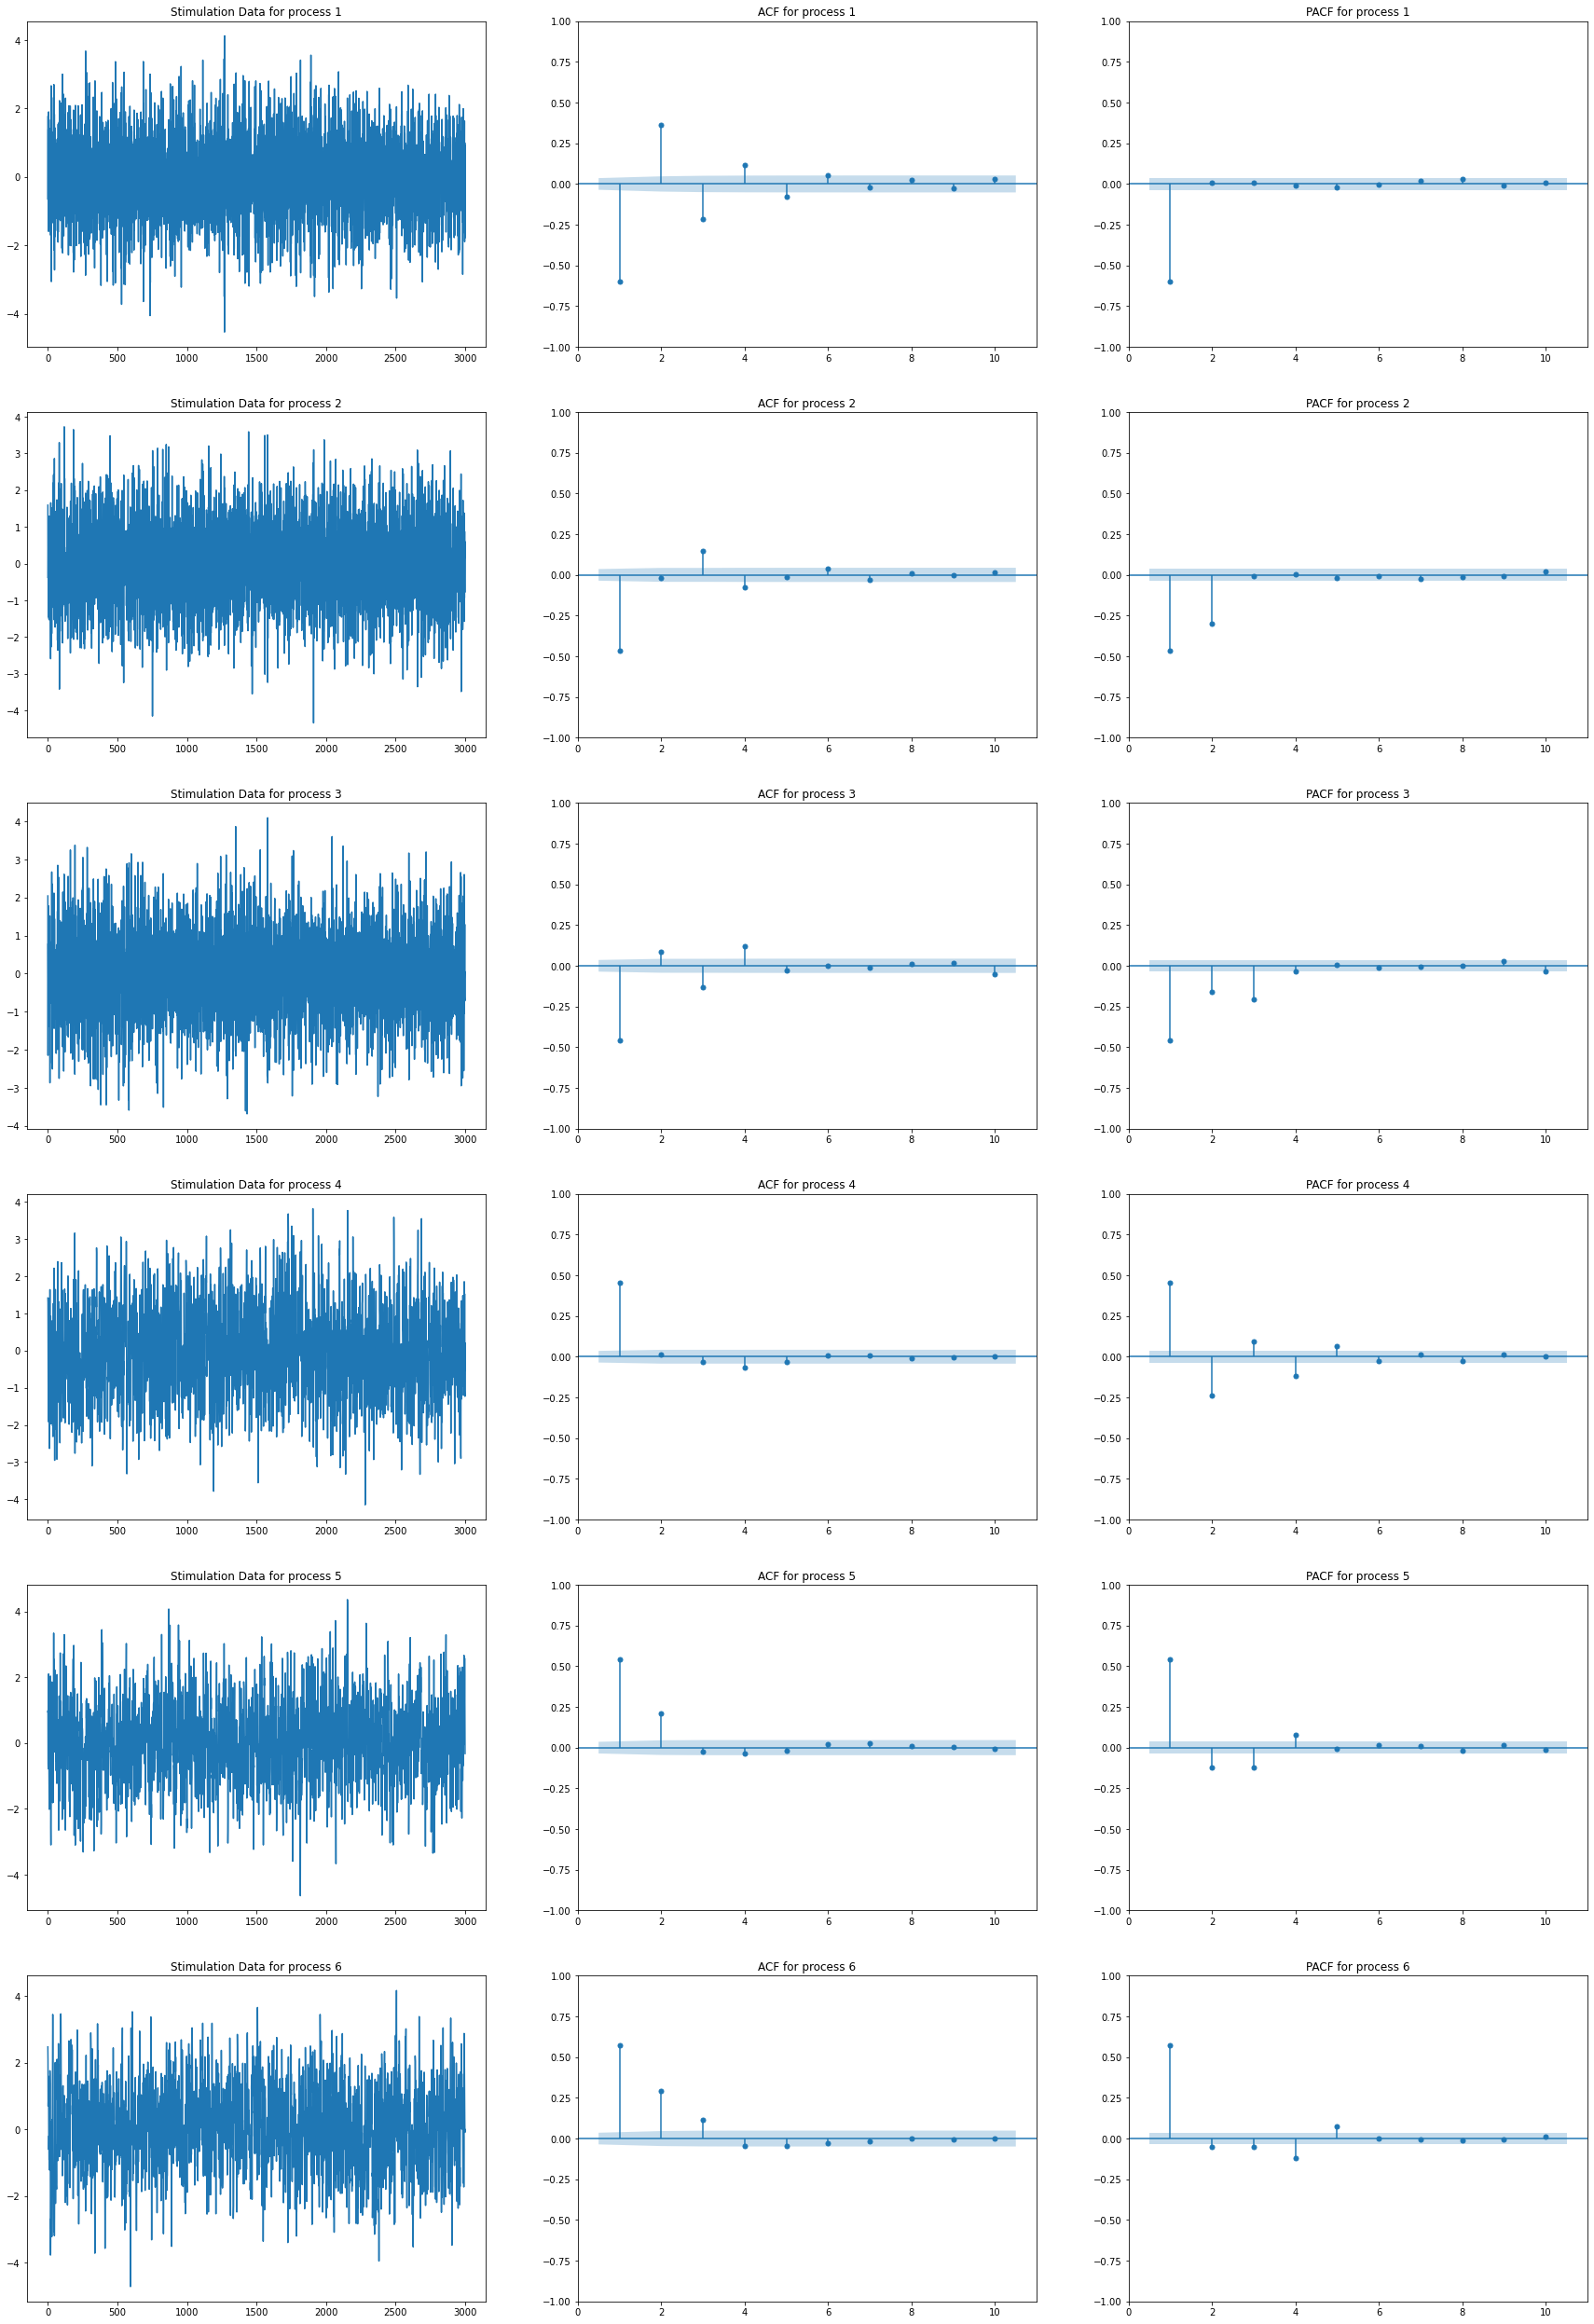

In [15]:
np.random.seed(0)
nsample = 3000

# Simulate AR(1) process
ar1 = np.r_[1, 0.6]
ma1 = np.array([1])
ar1_data = sm.tsa.arma_generate_sample(ar=ar1, ma=ma1, nsample=nsample)

# Simulate AR(2) process
ar2 = np.r_[1, 0.6, 0.3]
ma2 = np.array([1])
ar2_data = sm.tsa.arma_generate_sample(ar=ar2, ma=ma2, nsample=nsample)

# Simulate AR(3) process
ar3 = np.r_[1, 0.6, 0.3, 0.2]
ma3 = np.array([1])
ar3_data = sm.tsa.arma_generate_sample(ar=ar3, ma=ma3, nsample=nsample)

# Simulate MA(1) process
ar4 = np.array([1])
ma4 = np.r_[1, 0.6]
ma1_data = sm.tsa.arma_generate_sample(ar=ar4, ma=ma4, nsample=nsample)

# Simulate MA(2) process
ar5 = np.array([1])
ma5 = np.r_[1, 0.6, 0.3]
ma2_data = sm.tsa.arma_generate_sample(ar=ar5, ma=ma5, nsample=nsample)

# Simulate MA(3) process
ar6 = np.array([1])
ma6 = np.r_[1, 0.6, 0.3, 0.2]
ma3_data = sm.tsa.arma_generate_sample(ar=ar6, ma=ma6, nsample=nsample)

# Plot data, ACF and PACF for each process
fig, axs = plt.subplots(6, 3, figsize=(30,45))
for i, data in enumerate([ar1_data, ar2_data, ar3_data, ma1_data, ma2_data, ma3_data]):
    axs[i, 0].plot(data)
    sm.graphics.tsa.plot_acf(data, lags=10, zero=False, ax=axs[i, 1])
    sm.graphics.tsa.plot_pacf(data, lags=10, zero=False, ax=axs[i, 2])
    axs[i, 0].set_title(f'Stimulation Data for process {i+1}')    
    axs[i, 1].set_title(f'ACF for process {i+1}')
    axs[i, 2].set_title(f'PACF for process {i+1}')

plt.savefig('ARMA Process.png', dpi =300)
plt.show()